## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [29]:
#relative packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#to make the figures look larger
plt.rcParams['figure.figsize'] = [11, 7]

office_pd = pd.read_csv('datasets/office_episodes.csv', parse_dates=['release_date']) #update it from object to date
office_pd.head() #to see if imported correctly
office_pd.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), objec

# Descriptive Statistics

In [30]:
average_duration= np.mean(office_pd['duration'])
print('The mean duration of the episodes is', average_duration, 'minutes.')

The mean duration of the episodes is 27.0531914893617 minutes.


In [31]:
average_viewership= np.mean(office_pd['viewership_mil'])
print('In average, The Office has', average_viewership, 'million views per episode.')

In average, The Office has 7.246329787234051 million views per episode.


In [32]:
from collections import Counter
  
director_names=office_pd['director']
  
Counter = Counter(director_names)
  
# most_common() produces k frequently encountered
most_occur = Counter.most_common(3)
   
print(most_occur)

[('Paul Feig', 15), ('Randall Einhorn', 15), ('Ken Kwapis', 13)]


**This gives us top 3 directors who directed the most episodes of the show.** 

In [33]:
from collections import Counter
  
writer_names=office_pd['writers']
  
Counter = Counter(writer_names)
  
most_frequent = Counter.most_common(3)
   
print(most_occur)

[('Paul Feig', 15), ('Randall Einhorn', 15), ('Ken Kwapis', 13)]


**This gives us top 3 writers who directed the most episodes of the show.**

In [34]:
least_watched = office_pd[office_pd['viewership_mil'] == office_pd['viewership_mil'].min()]
least_watched['viewership_mil'],least_watched['episode_title'],least_watched['season']

(184    3.25
 Name: viewership_mil, dtype: float64,
 184    Paper Airplane
 Name: episode_title, dtype: object,
 184    9
 Name: season, dtype: int64)

**The least watched episode of the show is called "Paper Airplane" and it's 184th episode of the show. Additionally, we now know that it has 3.25 million viewership.**

In [35]:
most_watched = office_pd[office_pd['viewership_mil'] == office_pd['viewership_mil'].max()]
most_watched['viewership_mil'],most_watched['episode_title'],most_watched['season']

(77    22.91
 Name: viewership_mil, dtype: float64,
 77    Stress Relief
 Name: episode_title, dtype: object,
 77    5
 Name: season, dtype: int64)

**I did the same for the most watched episode. The most watched episode of the show is titled as "Stress Relief" and it's 77th episode of the show. It has 22.91 million views.**

In [36]:
office_pd[office_pd['viewership_mil'] == office_pd['viewership_mil'].max()]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object

**Among the guest stars, I wanted to know whether there is a guest star on the most watched episode and if there is, who is he/she. This shows there are three guest stars on the most watched episode of The Office.**

In [37]:
ratings_higher= office_pd['scaled_ratings'] > 0.5

#the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(office_pd['has_guests'] == True, ratings_higher == True)
print('stat=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
	print('There is a dependency between the samples.')
else:
	print('These two samples are independent.')

stat=0.042, p=0.566
These two samples are independent.


**Above, I'd like to know whether there is a correlation between having guest stars on the episodes and having higher ratings. It looks like there is no statistically significant correlation.**

# Plot Customization

In [38]:
colors = []

for ind, row in office_pd.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append('red')
    elif row['scaled_ratings'] < 0.50:
        colors.append('orange')
    elif row['scaled_ratings'] < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

**Above, I wanted to show scaled ratings in different colors to make it more readable.**

In [39]:
sizing = []

for ind, row in office_pd.iterrows():
    if row['has_guests'] == False:
        sizing.append(25)
    else:
        sizing.append(250)

**If there are no guest stars, the size of the plot will be 25, if there's, it will be 250.**

In [40]:
#Adding columns into the dataset.
office_pd['colors'] = colors
office_pd['sizes'] = sizing
office_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   episode_number  188 non-null    int64         
 1   season          188 non-null    int64         
 2   episode_title   188 non-null    object        
 3   description     188 non-null    object        
 4   ratings         188 non-null    float64       
 5   votes           188 non-null    int64         
 6   viewership_mil  188 non-null    float64       
 7   duration        188 non-null    int64         
 8   release_date    188 non-null    datetime64[ns]
 9   guest_stars     29 non-null     object        
 10  director        188 non-null    object        
 11  writers         188 non-null    object        
 12  has_guests      188 non-null    bool          
 13  scaled_ratings  188 non-null    float64       
 14  colors          188 non-null    object        
 15  sizes 

In [41]:
#to visualize the episodes with guests and without guests.
non_guest = office_pd[office_pd['has_guests'] == False]
guest = office_pd[office_pd['has_guests'] == True]

In [42]:
guest[guest['scaled_ratings']>0.5]['guest_stars'] 

8                                           Nancy Carell
9                                              Amy Adams
12                                           Tim Meadows
14                                             Ken Jeong
16                                            Rob Riggle
21                                         Conan O'Brien
53                                          Kevin McHale
66                                  Wendi McLendon-Covey
77             Cloris Leachman, Jack Black, Jessica Alba
82                                            Idris Elba
108                                        Mellisa Rauch
117                                          Evan Peters
130    Will Arnett,  Ray Romano, Jim Carrey, Ricky Ge...
185                                   Michael Imperioli 
187    Joan Cusack, Ed Begley Jr, Rachel Harris, Nanc...
Name: guest_stars, dtype: object

**These are the guest stars that appeared on the episodes where the ratings were above 0.5
In the plot, it corresponds to light green and dark green.**

# The Plot

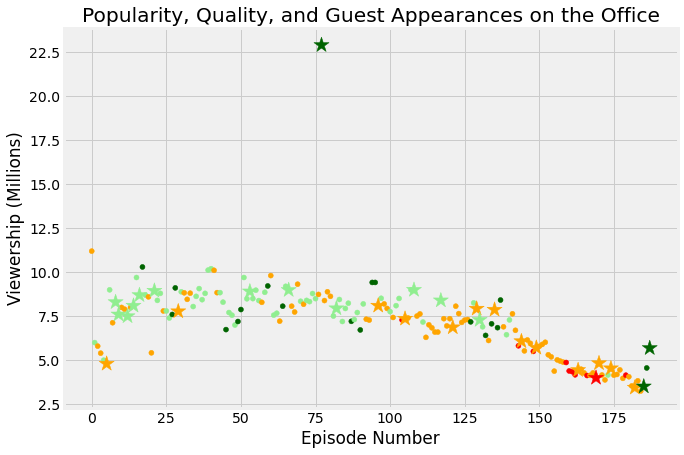

In [43]:
fig = plt.figure() #this line is given in the instructions. 
plt.style.use('fivethirtyeight')

plt.scatter(x=non_guest['episode_number'], 
            y=non_guest['viewership_mil'],
            c=non_guest['colors'], 
            s=non_guest['sizes']
           )

plt.scatter(x=guest['episode_number'],  
            y=guest['viewership_mil'],
            c=guest['colors'], 
            s=guest['sizes'],
            marker='*'
           )
plt.title("Popularity, Quality, and Guest Appearances on the Office")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (Millions)")
plt.show()

**In this graph, we can clearly see that there's serious decline in popularity of the show around 140th episode. Additionally, ratings got worse during this falling period which we can tell from the color of the dots being more orangey towards the end. Lastly one can immediately notice that there is strong outliner for the most watched episode. It's watched around double the size of mean viewership throughout the show.**

## Thank you for this class. If something is not correct, please let me know.
### Best regards
### Ülkü